In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. tensorflow v.2.xx에서 v1사용하기

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [6]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [10]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [13]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [15]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [17]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([0.12661324], dtype=float32), array([1.0671515], dtype=float32)]

In [20]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([0.5116679], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟변수 y가 1개

In [24]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
# cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 w,b를 찾아내는 것
cost는 2차 함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# w, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:51.893341064453125, W:[-0.69966435], b:[-1.8605034]
200번째 cost:0.17249281704425812, W:[1.4812118], b:[-0.09390736]
400번째 cost:0.06586617976427078, W:[1.2973596], b:[0.32403183]
600번째 cost:0.02515093982219696, W:[1.1837503], b:[0.5822927]
800번째 cost:0.009603876620531082, W:[1.1135466], b:[0.7418821]
1000번째 cost:0.0036672186106443405, W:[1.0701648], b:[0.84049886]
1200번째 cost:0.0014003239339217544, W:[1.0433575], b:[0.9014381]
1400번째 cost:0.0005347124533727765, W:[1.0267923], b:[0.93909466]
1600번째 cost:0.000204175608814694, W:[1.0165559], b:[0.96236455]
1800번째 cost:7.796645513735712e-05, W:[1.0102308], b:[0.9767434]
2000번째 cost:2.977029544126708e-05, W:[1.0063218], b:[0.9856289]
2200번째 cost:1.1368450941517949e-05, W:[1.0039066], b:[0.9911193]
2400번째 cost:4.341121439210838e-06, W:[1.0024141], b:[0.99451226]
2600번째 cost:1.6580606825300492e-06, W:[1.001492], b:[0.9966085]
2800번째 cost:6.336264277706505e-07, W:[1.0009223], b:[0.99790347]
3000번째 cost:2.4232096507148526e-07, W:[1.00057

In [25]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [29]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [32]:
def predict(x):
    return W_[0]*x + b_[0]

In [33]:
input_x = int(input('입력값은 ?'))
print('예측값은', predict(input_x))

입력값은 ?3
예측값은 4.000007212162018


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [34]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [36]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:24.221302032470703, W:[1.739087], b:[-0.86695945]
200째 : cost:0.09186318516731262, W:[2.1030734], b:[0.44907457]
400째 : cost:0.009035510942339897, W:[2.032326], b:[0.82721806]
600째 : cost:0.0008887364529073238, W:[2.0101383], b:[0.94581175]
800째 : cost:8.740871271584183e-05, W:[2.0031796], b:[0.9830056]
1000째 : cost:8.598157364758663e-06, W:[2.0009973], b:[0.9946699]
1200째 : cost:8.460785352326639e-07, W:[2.0003126], b:[0.99832845]
1400째 : cost:8.314570010270472e-08, W:[2.0000982], b:[0.9994755]
1600째 : cost:8.164500187035628e-09, W:[2.0000308], b:[0.9998355]
1800째 : cost:8.280153229733855e-10, W:[2.0000098], b:[0.9999481]
2000째 : cost:8.86757334228605e-11, W:[2.0000033], b:[0.9999828]
2200째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000째 : cost:2.060005464821213e

In [37]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [39]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정X)

In [40]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(3001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:5591.599609375, W:[7.3931284], b:[1.6516212]
200째 : cost:83.79957580566406, W:[10.165374], b:[-0.35719]
400째 : cost:83.51139831542969, W:[10.26112], b:[-1.06612]
600째 : cost:83.48500061035156, W:[10.29012], b:[-1.2808503]
800째 : cost:83.4825439453125, W:[10.298904], b:[-1.3458896]
1000째 : cost:83.48233032226562, W:[10.301565], b:[-1.3655903]
1200째 : cost:83.4822998046875, W:[10.302371], b:[-1.371557]
1400째 : cost:83.48231506347656, W:[10.302615], b:[-1.3733642]
1600째 : cost:83.48231506347656, W:[10.302689], b:[-1.3739114]
1800째 : cost:83.48231506347656, W:[10.3027115], b:[-1.3740755]
2000째 : cost:83.48230743408203, W:[10.302717], b:[-1.3741244]
2200째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2400째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2600째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2800째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3200째 : cost:83.48233032226

In [41]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(scale 조정 O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화)
                     X - Xmin
    normalization = ------------
                     Xmax - Xmin
        * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
        
- standardization(표준화)
                        X - Xmean(평균)
    standardization = -------------------
                          Xstd(표준편차)
        * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)                      

In [43]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [49]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1, 1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaled_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaled_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [53]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.7729796171188354, W:[-0.32300463], b:[1.3953488]
600째 : cost:0.31414806842803955, W:[-0.31688064], b:[0.90460443]
1200째 : cost:0.22629372775554657, W:[-0.18151951], b:[0.7240756]
1800째 : cost:0.17282530665397644, W:[-0.03473401], b:[0.6221593]
2400째 : cost:0.13304570317268372, W:[0.09940705], b:[0.5458536]
3000째 : cost:0.10300058126449585, W:[0.21750323], b:[0.48225683]
3600째 : cost:0.08028483390808105, W:[0.32051873], b:[0.4275726]
4200째 : cost:0.06310941278934479, W:[0.41016778], b:[0.38016003]
4800째 : cost:0.05012301355600357, W:[0.4881376], b:[0.33896348]
5400째 : cost:0.04030389338731766, W:[0.5559397], b:[0.3031483]
6000째 : cost:0.03287959471344948, W:[0.6148973], b:[0.272007]
6600째 : cost:0.027265984565019608, W:[0.66616434], b:[0.2449284]
7200째 : cost:0.023021550849080086, W:[0.7107427], b:[0.22138256]
7800째 : cost:0.019812321290373802, W:[0.7495054], b:[0.20090862]
8400째 : cost:0.01738579012453556, W:[0.78321147], b:[0.18310548]
9000째 : cost:0.015551088377833366, W:

In [59]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력:', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaled_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력:
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.21693107]
 [0.3181267 ]]
결과 :
[[22.957659]
 [32.26766 ]]


In [63]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaled_y.inverse_transform(scaled_y_hat)

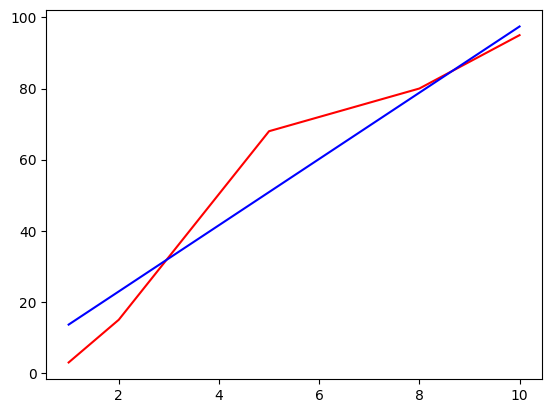

In [64]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [68]:
# 라이브러리를 사용하여 표준화(StandardScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaled_y = StandardScaler() # y_data를 표준화할 객체
scaler_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaled_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[ 0.         -1.34819316]
 [ 0.11111111 -1.01936556]
 [ 0.44444444  0.43295634]
 [ 0.77777778  0.76178394]
 [ 1.          1.17281844]]


In [69]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:2.1816773414611816, W:[-0.5257124], b:[-0.6194176]
600째 : cost:0.8974326252937317, W:[0.15532404], b:[-0.1613238]
1200째 : cost:0.6554546356201172, W:[0.52937603], b:[-0.1759866]
1800째 : cost:0.5089616775512695, W:[0.8058426], b:[-0.28110492]
2400째 : cost:0.40002164244651794, W:[1.0353307], b:[-0.3931683]
3000째 : cost:0.31774240732192993, W:[1.232441], b:[-0.49523306]
3600째 : cost:0.2555355429649353, W:[1.4032899], b:[-0.5850159]
4200째 : cost:0.20850077271461487, W:[1.5517282], b:[-0.6633173]
4800째 : cost:0.17293736338615417, W:[1.6807752], b:[-0.7314552]
5400째 : cost:0.1460476815700531, W:[1.792981], b:[-0.7907158]
6000째 : cost:0.1257161945104599, W:[1.8905476], b:[-0.8422481]
6600째 : cost:0.11034344136714935, W:[1.9753857], b:[-0.8870581]
7200째 : cost:0.09872005134820938, W:[2.049156], b:[-0.9260223]
7800째 : cost:0.089931420981884, W:[2.113303], b:[-0.95990384]
8400째 : cost:0.08328636735677719, W:[2.1690807], b:[-0.9893652]
9000째 : cost:0.07826204597949982, W:[2.2175817], b:

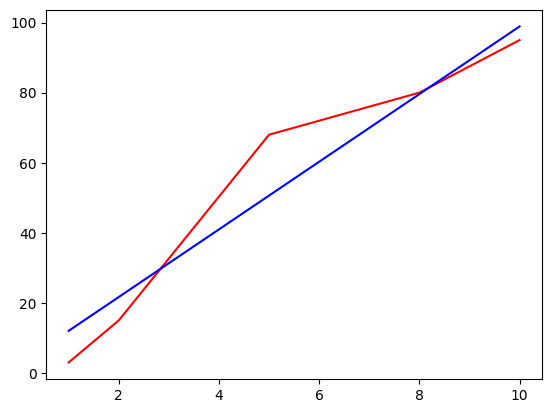

In [70]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaled_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')